In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

plt.rcParams['figure.dpi'] = 100
mpl.rcParams.update({'font.size': 14})

In [6]:
# Define column names based on galprop.dat header
colnames = [
    "halo_id", "gal_id", "redshift",
    "v_disk", "r_disk", "sigma_bulge", "r_bulge",
    "mhalo", "rhalo", "vhalo", "m_strip",
    "mstar", "mstar_burst", "mcold", "mH2", "mHI", "mHII",
    "mbulge", "mBH", "maccdot", "maccdot_radio",
    "Zstar", "Zcold", "tau0", "mstardot", "sfr_burst",
    "sfr_ave", "meanage", "tmerge", "tmajmerge", "mu_merge",
    "t_sat", "r_fric", "cosi", "beta", "beta_dust"
]

data_dir = '/home/sophienewman/Desktop/data/cca/part_z0.00_z0.05/part_z0.00_z0.05'

# Read the .dat file, skipping comment lines starting with '#'
df = pd.read_csv(
    f"{data_dir}/galprop.dat", 
    delim_whitespace=True, 
    comment="#", 
    names=colnames
)

# Quick check
print(df.head())
print(df.info())

   halo_id  gal_id  redshift      v_disk    r_disk  sigma_bulge   r_bulge  \
0        2       1  0.021348  307.993120  9.696200   133.392340  1.164658   
1        2      33  0.021348   49.013695  0.733257    36.569040  0.000000   
2        2      44  0.021348   56.442906  1.385767    45.081714  0.000000   
3        2      46  0.021348   79.345405  1.571389   156.852050  0.002752   
4        2      51  0.021348   50.606292  1.166125    36.766840  0.000000   

       mhalo     rhalo       vhalo  ...   sfr_ave    meanage     tmerge  \
0  12.957363  0.542301  280.739160  ...  0.005304  10.617259  10.592337   
1  10.185366  0.027380   53.417290  ...  0.000001  10.752273 -99.900000   
2  10.579348  0.051121   68.069007  ...  0.000018  10.449708 -99.900000   
3  11.023086  0.071865   80.803161  ...  0.000122   9.047961  10.875008   
4  10.491549  0.051943   57.546815  ...  0.000009   9.515830 -99.900000   

   tmajmerge  mu_merge      t_sat    r_fric      cosi      beta  beta_dust  
0 -99.900

/tmp/ipykernel_23668/1454522863.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [34]:
mdot = df["maccdot_radio"].to_numpy()
    
print('Total mdot values:', len(mdot))
print('Number of these that are zero:', np.sum(mdot == 0))

Total mdot values: 88
Number of these that are zero: 31


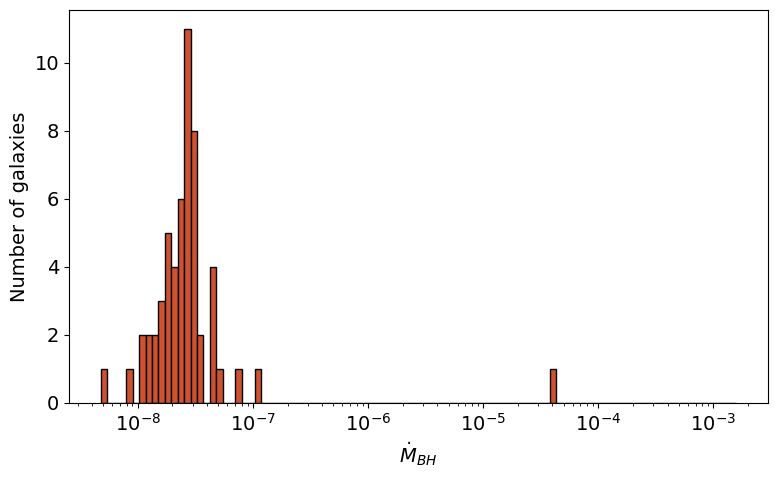

In [48]:
nonzero_mdot = mdot[mdot != 0]

# --- Histogram with log-scaled x-axis ---
plt.figure(figsize=(8,5))
plt.hist(nonzero_mdot, bins=np.logspace(np.log10(nonzero_mdot.min()),
                                           np.log10(nonzero_mdot.max()), 100),
         edgecolor="black",
         facecolor="#cf5230")
plt.xscale("log")
plt.xlabel(r"$\dot{M}_{BH}$")
plt.ylabel("Number of galaxies")
plt.tight_layout()
plt.show()